In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
covid_data = pd.read_csv("./time_series_2019-ncov-Confirmed.csv")

In [7]:
covid_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,309.000000
mean,30.285772,-33.097762,1.107784,1.303393,1.878244,2.862275,4.227545,5.842315,11.133733,12.307385,...,311.564870,334.223553,362.329341,393.497006,428.962076,484.447106,543.245509,607.832335,670.568862,1087.391586
std,19.870544,80.661210,19.886889,19.969170,24.875593,34.637942,48.422475,65.253024,159.914427,160.961540,...,3263.324717,3332.995975,3415.516311,3511.636870,3642.374951,3832.930820,4064.084657,4337.179809,4594.278660,5814.685942
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,76.000000
75%,42.165700,21.824300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,22.000000,28.000000,37.000000,50.000000,58.000000,76.000000,89.000000,117.000000,135.000000,326.000000
max,72.000000,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [8]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [9]:
covid_data.shape

(501, 66)

In [10]:
columns = covid_data.columns

In [11]:
covid_data=covid_data.loc[:]

In [12]:
covid_data=covid_data.loc[:, covid_data.isin([0]).mean() < .7]

In [24]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,43,47,48,50,50,50,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,331,360,420,461,502,511,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,110,117,130,138,150,150,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,50,50,83,93,99,117,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [25]:
country_data=covid_data.drop(["Province/State","Lat","Long"],axis=1)

In [26]:
print(country_data)

            Country/Region  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
0                 Thailand      43      47      48      50      50      50   
1                    Japan     331     360     420     461     502     511   
2                Singapore     110     117     130     138     150     150   
3                    Nepal       1       1       1       1       1       1   
4                 Malaysia      50      50      83      93      99     117   
..                     ...     ...     ...     ...     ...     ...     ...   
496                 Jersey       0       0       0       0       0       0   
497            Puerto Rico       0       0       0       0       0       0   
498  Republic of the Congo       0       0       0       0       0       0   
499            The Bahamas       0       0       0       0       0       0   
500             The Gambia       0       0       0       0       0       0   

     3/10/20  3/11/20  3/12/20  ...  3/14/20  3/15/20  3/16/20 

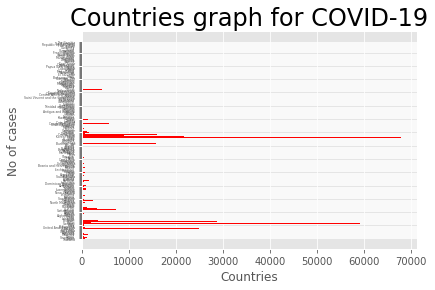

In [27]:
# Country wise graph
col_name="Country/Region"
date="3/22/20"
plt.style.use('ggplot')
plt.barh(col_name, date, data = country_data[[date,col_name]], color = "red")
plt.xlabel("Countries")
plt.xticks(fontsize = 10)
plt.ylabel("No of cases")
plt.yticks(fontsize = 3)
plt.title("Countries graph for COVID-19", fontsize = 24)
plt.plot(figsize=(30, 16))
plt.show()

In [28]:
#date wise graph
country_data=country_data.set_index('Country/Region')

In [29]:
print(country_data.loc['India'].to_list())

[28.0, 30.0, 31.0, 34.0, 39.0, 43.0, 56.0, 62.0, 73.0, 82.0, 102.0, 113.0, 119.0, 142.0, 156.0, 194.0, 244.0, 330.0, 396.0, 396.0]


Text(0.5, 0, 'Date')

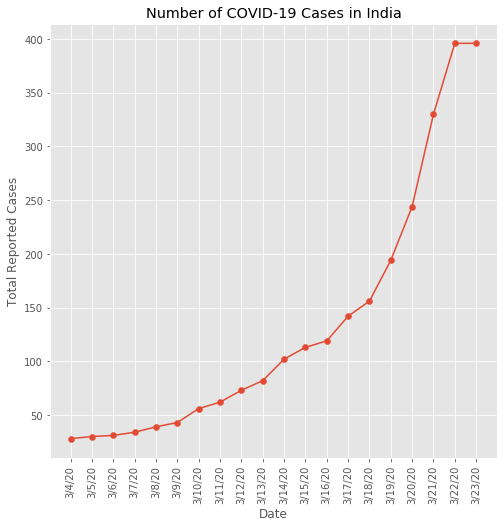

In [30]:
fig = plt.figure(figsize=(8,8))
plt.scatter(x=country_data.columns,y=country_data.loc['India'].tolist())
plt.plot(country_data.columns,country_data.loc['India'].tolist())
plt.xticks(country_data.columns,country_data.columns, rotation='vertical')
plt.title("Number of COVID-19 Cases in India")
plt.ylabel("Total Reported Cases")
plt.xlabel("Date")

In [40]:
import pycountry_convert as pc
print(country_data.reset_index())
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
continent = country_data.apply(lambda x:country_to_continent(x),axis=1)

            Country/Region  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
0                 Thailand      43      47      48      50      50      50   
1                    Japan     331     360     420     461     502     511   
2                Singapore     110     117     130     138     150     150   
3                    Nepal       1       1       1       1       1       1   
4                 Malaysia      50      50      83      93      99     117   
..                     ...     ...     ...     ...     ...     ...     ...   
496                 Jersey       0       0       0       0       0       0   
497            Puerto Rico       0       0       0       0       0       0   
498  Republic of the Congo       0       0       0       0       0       0   
499            The Bahamas       0       0       0       0       0       0   
500             The Gambia       0       0       0       0       0       0   

     3/10/20  3/11/20  3/12/20  ...  3/14/20  3/15/20  3/16/20 

TypeError: ("'Series' objects are mutable, thus they cannot be hashed", 'occurred at index Thailand')

In [3]:
import sys
sys.executable
sys.path

['/home/sdasu/10daysMLchallenge',
 '/home/sdasu/anaconda3/lib/python37.zip',
 '/home/sdasu/anaconda3/lib/python3.7',
 '/home/sdasu/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/home/sdasu/.local/lib/python3.7/site-packages',
 '/home/sdasu/anaconda3/lib/python3.7/site-packages',
 '/home/sdasu/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/sdasu/.ipython']